![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Albane Colmenares
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

In [28]:
# Understand:  
# films's types that are doing best at box office. 
# Goal: 
# Become a new movie studio 
# does studio type matter?

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

%matplotlib inline


In [2]:
# Here you run your code to explore the data


### 1. bom.movie_gross.csv.gz

In [3]:
# Loading and inspecting available datasets
# Loading bom.movie_gross and storing data into df_movie_gross
df_movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz', compression='gzip')

df_movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# conn = sqlite3.connect('data/im.db')

# df_imdbtest = pd.read_sql('data/im.db.zip', conn)
# #
# df_imdbtest.head()

In [5]:
# Inspect overall shape and info of the dataframe
df_movie_gross.shape
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# df_movie_gross data cleaning
# Inspect the 5 studio null information
df_movie_gross[df_movie_gross['studio'].isnull()]


,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [7]:
# Inspect the studios in general
studios = df_movie_gross.drop_duplicates(subset=['studio'])
print(studios['studio'].tolist())
print(len(studios['studio'].tolist()))
# There are 258 production studios, which is large enough to remove 5 
# rows that don't have any studios. 

['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony', 'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS', 'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV', 'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.', 'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW', 'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE', 'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.', 'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.', 'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.', 'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket', 'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4', 'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer', 'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP', 'RF', 'ArcEnt', 'PalUni', 'EpicPics', 'EOne', 'LD', 'AF', 'TFA', 'Myr.', 'BM&DH', 'SEG', 'PalT

In [8]:
# Dropping rows
df_movie_gross = df_movie_gross[df_movie_gross['studio'].notna()]
# Verifying that na rows were dropped 
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [9]:
# Inspecting movies that don't have domestic revenue: do they have a 
# foreign revenue? 
df_movie_gross[df_movie_gross['domestic_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
936,"Lula, Son of Brazil",NYer,NaN,3800000,2012


In [10]:
# All movies that don't have domestic revenue were distributed oversees 

In [11]:
# Now inspecting the same info for foreign revenue
df_movie_gross[df_movie_gross['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
# Convert foreign_gross column as float
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].str.replace(',','').astype(np.float64)

# Filling na values with 0 on both columns:
df_movie_gross.update(df_movie_gross[['domestic_gross', 'foreign_gross']].fillna(0))

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [50]:
# Create a column total gross 
df_movie_gross["total_gross (in '000)"] = (df_movie_gross["domestic_gross"] + df_movie_gross["foreign_gross"]) / 1000

In [51]:
# Sorting by highest total revenue generated by movies
df_movie_gross.sort_values(by=["total_gross"], ascending=False, inplace=True)
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross (in '000)
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900.0,1518900.0
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400.0,1405400.0
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347000.0,1347000.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1341500.0,1341500.0
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600.0,1332600.0
...,...,...,...,...,...,...,...
3078,2:22,Magn.,400.0,0.0,2017,0.4,0.4
2756,News From Planet Mars,KL,300.0,0.0,2016,0.3,0.3
2757,Satanic,Magn.,300.0,0.0,2016,0.3,0.3
2321,The Chambermaid,FM,300.0,0.0,2015,0.3,0.3


In [39]:
top_20_revenue_movies = df_movie_gross.head(20).reset_index(drop=True)
top_20_revenue_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross (in '000)
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900.0,1518900.0
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400.0,1405400.0
2,Black Panther,BV,700100000.0,646900000.0,2018,1347000.0,1347000.0
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1341500.0,1341500.0
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600.0,1332600.0
5,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1309500.0,1309500.0
6,Frozen,BV,400700000.0,875700000.0,2013,1276400.0,1276400.0
7,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1263500.0,1263500.0
8,Incredibles 2,BV,608600000.0,634200000.0,2018,1242800.0,1242800.0
9,Iron Man 3,BV,409000000.0,805800000.0,2013,1214800.0,1214800.0


Text(0.5, 1.0, "Distribution of films' revenues")

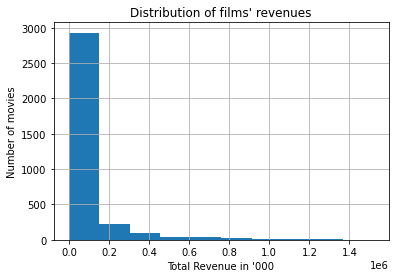

In [48]:
# Reviewing how frequently movies generate large revenues

df_movie_gross["total_gross"].hist(bins=10)
plt.xlabel("Total Revenue in '000")
plt.ylabel("Number of movies")
plt.title("Distribution of films' revenues")

In [ ]:
# The histogram is highly skewed to the left, indicating the largest majority of movies make less than ...

In [ ]:
# Question on revenues??


In [ ]:
# Scatter plot between year and revenue generated

## Data Exploration


### 2. im.db.zip

In [14]:
# Loading and inspecting available datasets
# Loading bom.movie_gross and storing data into df_movie_gross

import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [15]:
# Loading im.db and storing data into df_imdb

# Creating connection to database
conn = sqlite3.connect('data/im.db')

# Creating a cursor
cur = conn.cursor()


In [16]:
df = pd.read_sql("""
                SELECT * 
                FROM sqlite_master
""", con=conn)
df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [17]:
# Viewing tables in database
# with read_sql_query
imdb_data = pd.read_sql_query(
                              """
                              SELECT name from sqlite_master 
                              WHERE type="table"
                              ;
                              """
,conn)
imdb_data.head()

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [57]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [58]:
# What does each table show? 
q = """
SELECT *
FROM movie_basics
LIMIT 10
;
"""
pysqldf(q)

PandaSQLException: (sqlite3.OperationalError) no such table: movie_basics
[SQL: 
SELECT *
FROM movie_basics
LIMIT 10
;
]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

### 3. rt.movie_info.tsv

In [19]:
# Inspecting rt.movie_info file
# Loading rt.movie_info and storing data into df_movie_info

df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', compression='gzip', sep='\t')

df_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
# Inspect overall shape and info of the dataframe
df_movie_info.shape
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## notes
### df_movie_info data cleaning: 
-  all dates are strings, turn into datetime, keep only year? create month and year columns? 
-  only 340 rows with currency and box office, can we do anything with this information?
-  runtime should be useful to test correlation between rating or reviews, so turn into integer 

### 4. rt.reviews.tsv

In [21]:
# Inspecting rt.reviews file
# Loading rt.reviews and storing data into df_reviews

df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding = 'unicode_escape')
df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
# Inspect overall shape and info of the dataframe
df_reviews.shape
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## notes
-  review null rows and either drop or replace
-  is rating out of 5 for all and can one same ratio be used for all

### 5. tmdb.movies.csv

In [35]:
# Inspecting tmdb.movies file
# Loading tmdb.movies and storing data into df_tmdb_movies
# Dropping the unnamed column as well 


df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', compression='gzip', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [36]:
# df_tmdb_movies.genre_ids[0]
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.apply(lambda x: x[1:-1].split(','))
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [37]:
type(df_tmdb_movies.genre_ids[0])

list

In [38]:
df_tmdb_movies.explode('genre_ids')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


If needed to change genre ids, use: explode. 


In [39]:
# Inspect overall shape and info of the dataframe
df_tmdb_movies.shape
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ MB


## notes
-  unnamed0 column to drop --> example heroes_df = heroes_df.drop(['Unnamed: 0'], axis=1)
-  genre_ids to remove from list? 
-  release date: turn into datetime to create 2 columns for year and month?

### 6. tn.movie_budgets.csv

In [40]:
# Inspecting tn.movie_budgets file
# Loading tn.movie_budgets and storing data into df_movie_budgets

df_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz', compression='gzip')

df_movie_budgets.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
df_movie_budgets.shape
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## notes
-  turn production_budget, domestic_gross, worldwide_gross as integers 
-  strip $ and , signs from these columns
-  again, dates as datetime, year and month?

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [30]:
# Here you run your code to clean the data


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [31]:
# Drop the column Unnamed: 0 with axis=1
# Example heroes_df = heroes_df.drop(['Unnamed: 0'], axis=1)
# heroes_df.head()

# tn.movie_budgets: turn object columns as numbers and strip $ and , 

In [32]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [33]:
# Closing connection
# conn.close()